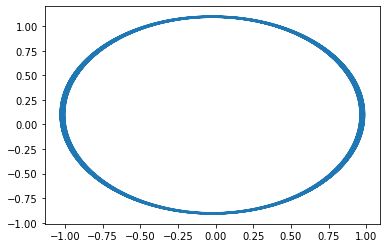

In [2]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt

x = np.load('earth_pos.npy')
x = np.delete(x, 2, 1) # deletes z-coordinates

plt.plot(x[:,0], x[:,1])

def plot(x, y, x_model, y_model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5.5))
    ax[0].plot(x, y, label='Data')
    ax[0].plot(x_model, y_model, '-', label='SINDy')
    ax[0].set(xlabel='x', ylabel='y')
    ax[1].set(xlabel='x', ylabel='y')
    #ax.legend()
    
model = ps.SINDy()

t = np.arange(0, x.shape[0], 1) # timesteps are in days


In [3]:

optimizer = ps.STLSQ(threshold=0.0001, fit_intercept=True)
# diff_method = ps.FiniteDifference(order=2)

xd = np.diff(x[:, 1])/np.diff(x[:, 0])

td = np.arange(0, xd.shape[0], 1)

model = ps.SINDy( 
        optimizer=optimizer,
        feature_names = ['x', 'y'])

model.fit(x, t=t, x_dot=xd)
model.print()

x_model = model.simulate(x[0, :], t)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x[:, 0], x[:, 1], label='Data')
ax.plot(x_model[:, 0], x_model[:, 1], '-', label='SINDy')
ax.set(xlabel='x', ylabel='y')
ax.legend()

ValueError: Length of t should match x.shape[0].